<a href="https://colab.research.google.com/github/gabrielvrl/Machine-Learning-ECT/blob/master/k_means_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# K-Means
# from https://www.superdatascience.com/machine-learning/ 


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "perfil_politico2019.csv"
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ect-info/ml/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls dados

perfil_politico2019.csv


In [0]:
# Importing the dataset
dataset = pd.read_csv(DATA_PATH+FILE_TO_DOWNLOAD)


dataset.head(10)

,Apoia privatizações das empresas brasileiras?,Lula deve ser solto,O impeachment de Dilma foi um golpe?,Legalização do aborto,Políticas de ações afirmativas (cotas),A favor da reforma agrária,Todos os brasileiro devem alcançar suas conquistas através da meritocracia,Apoia a legalização do porte de armas,Apoia a redução da maioridade penal,Apoia a laicidade do Estado,Apoia a diminuição do Estado,As Universidades são um gasto público?,A favor do foro privilegiado?,A favor de uma reforma política?,A favor de uma diminuição de regalias para os políticos?
0,1.0,0.0,0.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1,0.5,1.0,1.0,0.5,1.0,0.5,1.0,0.0,1.0,1.0,0.5,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
5,0.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.5,1.0,1.0
6,0.0,0.5,1.0,1.0,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,1.0,1.0,1.0
7,0.5,1.0,1.0,1.0,0.5,1.0,1.0,0.5,1.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.5,0.0,1.0,0.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
9,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


In [0]:
X = dataset.iloc[:,:].values
print(X)

#print(X[0:6,:])

[[1.  0.  0.  0.5 1.  1.  0.5 0.5 1.  1.  1.  0.  0.  1.  1. ]
 [0.5 1.  1.  0.5 1.  0.5 1.  0.  1.  1.  0.5 0.  0.  1.  1. ]
 [1.  0.  0.  1.  0.5 0.5 1.  1.  1.  1.  1.  0.  0.  0.  1. ]
 [1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  1.  0.  1.  1.  1. ]
 [0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  1.  1. ]
 [0.  1.  1.  1.  1.  1.  0.5 0.  0.  1.  0.  0.  0.5 1.  1. ]
 [0.  0.5 1.  1.  1.  0.  0.  0.  0.5 1.  0.  0.  1.  1.  1. ]
 [0.5 1.  1.  1.  0.5 1.  1.  0.5 1.  1.  1.  0.  0.  1.  0. ]
 [0.5 0.  1.  0.  0.5 0.5 0.  0.  0.  1.  1.  0.  0.  1.  1. ]
 [1.  0.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1. ]
 [1.  0.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1. ]
 [0.5 0.  0.5 0.  0.5 0.  1.  0.  1.  0.5 1.  0.  0.  1.  1. ]
 [0.5 0.5 1.  1.  0.5 0.  1.  0.  0.5 1.  0.5 0.  0.  1.  1. ]
 [0.5 0.5 1.  0.  1.  0.5 0.  0.  0.  1.  0.  0.  0.  1.  1. ]
 [0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  1.  1. ]
 [1.  0.  0.  0.  0.5 0.5 0.5 1.  1.  0.5 1.  1.  0.  1

In [0]:
# Fitting K-Means to the dataset

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'random', random_state = 1)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)




[0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1]


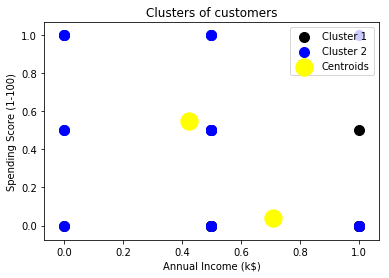

[0.70833333 0.04166667 0.29166667 0.5        0.33333333 0.5
 0.83333333 0.54166667 0.875      0.83333333 0.79166667 0.29166667
 0.04166667 0.91666667 1.        ]


In [0]:
# Visualising the clusters
#plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'red', label = 'Data')

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'black', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
print(kmeans.cluster_centers_[0,:])

In [0]:
gabriel = [0.5, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1]

In [0]:
print(kmeans.predict([gabriel]))

[1]
